In [2]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# read in the data
homicide = pd.read_csv("homicide_all.csv")

In [4]:
# get rid of missing values
homicide.isnull().sum()
homicide['victim_last'] = homicide['victim_last'].fillna('')
homicide[homicide['victim_last'].isnull()]
no_loc_entries = homicide[homicide['lat'].isnull()]

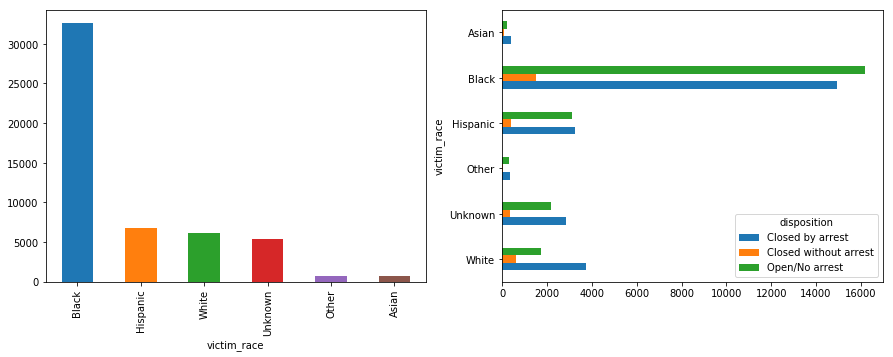

In [36]:
# plot homicides by race
fig, (ax1, ax2) = plt.subplots(nrows=1,
                                ncols=2,
                                sharex=False,
                                sharey=False,
                                figsize=(15, 5))

homicide.groupby('victim_race')['uid'].count().sort_values(ascending=False).plot(ax=ax1, kind='bar')
homicide.groupby(['victim_race', 'disposition']).count()['uid'].unstack().sort_values(by='victim_race', ascending=False).plot(ax=ax2, kind='barh')

In [10]:
# put age into buckets
homicide['victim_age'] = homicide['victim_age'].replace('Unknown', 999)
homicide.groupby('victim_age')['uid'].count().sort_values(ascending=False)
homicide['victim_age']= homicide['victim_age'].astype(int)

homicide['Victim_Age'] = pd.cut(homicide['victim_age'], [0, 12, 20, 40, 60,102,1000],labels = ['Kids', 'Teens', 'Young Adults','Old Adults','Old','Unknown'])
homicide['victim_age_range2'] = pd.cut(homicide['victim_age'], [0, 12, 20,30,40, 60,102,1000],labels = ['Kids', 'Teens', '20s','30s','Old Adults','Old','Unknown'])

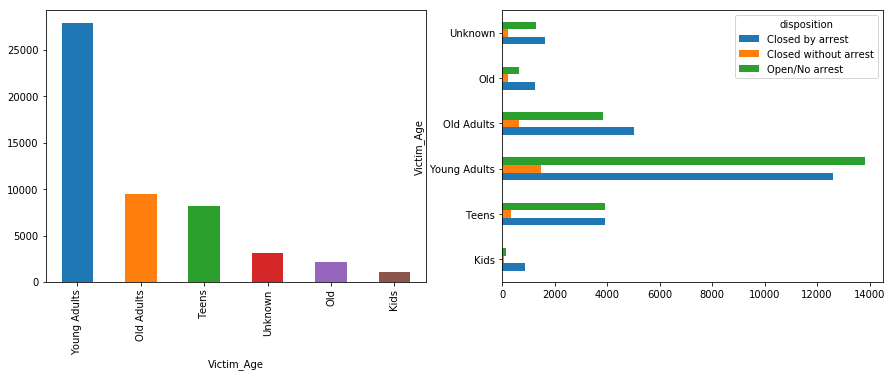

In [25]:
# plot homicides by age range
fig, (ax1, ax2) = plt.subplots(nrows=1,
                                ncols=2,
                                sharex=False,
                                sharey=False,
                                figsize=(15, 5))


homicide.groupby('Victim_Age')['uid'].count().sort_values(ascending=False).plot(ax=ax1, kind='bar')
homicide.groupby(['Victim_Age', 'disposition'])['uid'].count().unstack().sort_index().plot(ax=ax2, kind='barh')


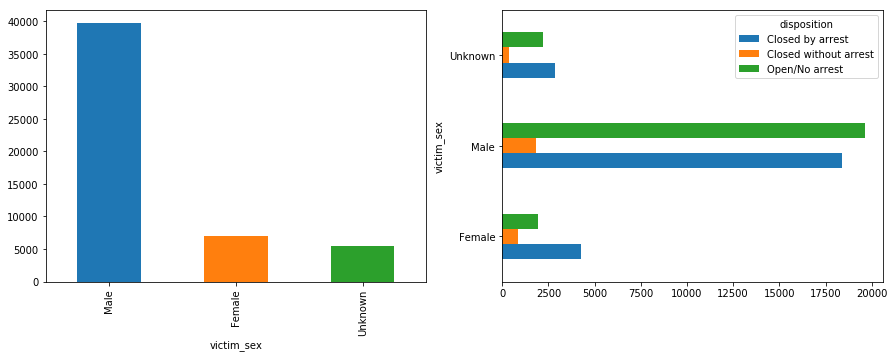

In [24]:
# plot homicides by gender and disposition
fig, (ax1, ax2) = plt.subplots(nrows=1,
                                ncols=2,
                                sharex=False,
                                sharey=False,
                                figsize=(15, 5))
homicide.groupby('victim_sex')['uid'].count().sort_values(ascending=False).plot(ax=ax1, kind='bar')
homicide.groupby(['victim_sex','disposition'])['uid'].count().unstack().sort_values(by='victim_sex', ascending=True).plot(ax=ax2, kind='barh')

In [8]:
from datetime import datetime
#datetime.datetime.strptime("21/12/2008", "%d/%m/%Y").strftime("%Y-%m-%d")
homicide['reported_date'] = homicide['reported_date'].replace(201511018,20151118)
homicide['reported_date'] = homicide['reported_date'].replace(201511105,20151105)
homicide['reported_date'] = homicide['reported_date'].apply(lambda l : datetime.strptime(str(l),"%Y%m%d").strftime("%Y-%m-%d"))

In [9]:
homicide['reported_date'] = homicide['reported_date'].astype('datetime64[ns]')
homicide['reported_month'] = homicide['reported_date'].apply(lambda x : x.month)
homicide['reported_year'] = homicide['reported_date'].apply(lambda x : x.year)
homicide['reported_day'] = homicide['reported_date'].apply(lambda x : x.day)

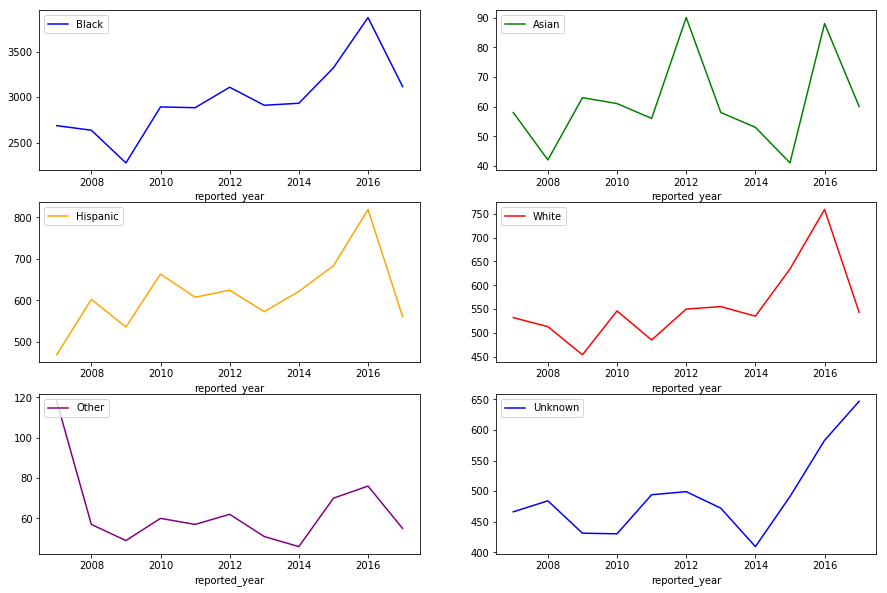

In [10]:
# time trends by race
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
homicide[homicide['victim_race'] == 'Black'].groupby('reported_year')['uid'].count().sort_index(ascending=True).plot(ax=axes[0,0], kind='line', label='Black', color='blue').legend(loc='upper left')
homicide[homicide['victim_race'] == 'Asian'].groupby('reported_year')['uid'].count().sort_index(ascending=True).plot(ax=axes[0,1], kind='line', label='Asian', color='green').legend(loc='upper left')
homicide[homicide['victim_race'] == 'Hispanic'].groupby('reported_year')['uid'].count().sort_index(ascending=True).plot(ax=axes[1,0], kind='line', label='Hispanic', color='orange').legend(loc='upper left')
homicide[homicide['victim_race'] == 'White'].groupby('reported_year')['uid'].count().sort_index(ascending=True).plot(ax=axes[1,1], kind='line', label='White', color='red').legend(loc='upper left')
homicide[homicide['victim_race'] == 'Other'].groupby('reported_year')['uid'].count().sort_index(ascending=True).plot(ax=axes[2,0], kind='line', label='Other', color='purple').legend(loc='upper left')
homicide[homicide['victim_race'] == 'Unknown'].groupby('reported_year')['uid'].count().sort_index(ascending=True).plot(ax=axes[2,1], kind='line', label='Unknown', color='blue').legend(loc='upper left')


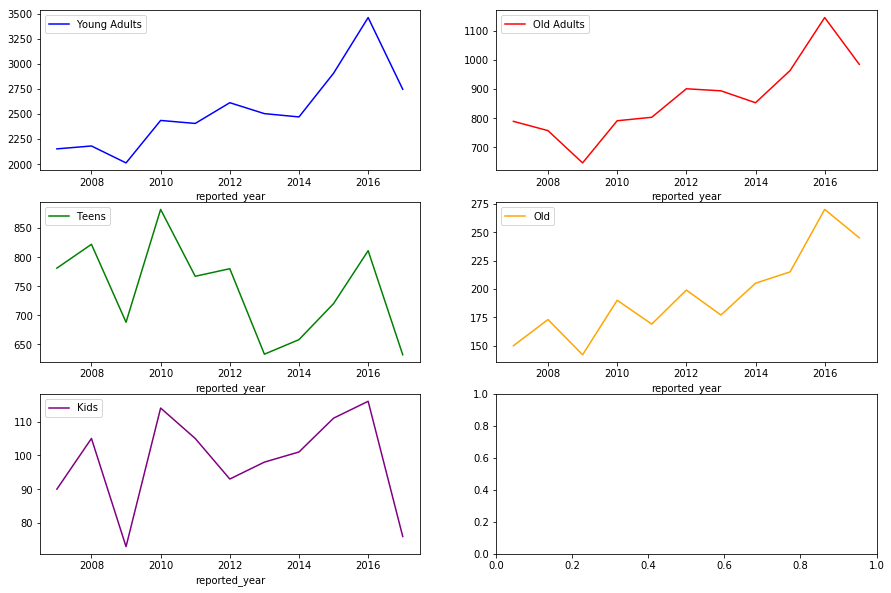

In [11]:
# time trends by age
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))


homicide[homicide['victim_age_range1'] == 'Young Adults'].groupby('reported_year')['uid'].count().sort_index(ascending=True).plot(ax=axes[0,0], kind='line', label='Young Adults', color='blue').legend(loc='upper left')
homicide[homicide['victim_age_range1'] == 'Old Adults'].groupby('reported_year')['uid'].count().sort_index(ascending=True).plot(ax=axes[0,1], kind='line', label='Old Adults', color='red').legend(loc='upper left')
homicide[homicide['victim_age_range1'] == 'Teens'].groupby('reported_year')['uid'].count().sort_index(ascending=True).plot(ax=axes[1,0], kind='line', label='Teens', color='green').legend(loc='upper left')
homicide[homicide['victim_age_range1'] == 'Old'].groupby('reported_year')['uid'].count().sort_index(ascending=True).plot(ax=axes[1,1], kind='line', label='Old', color='orange').legend(loc='upper left')
homicide[homicide['victim_age_range1'] == 'Kids'].groupby('reported_year')['uid'].count().sort_index(ascending=True).plot(ax=axes[2,0], kind='line', label='Kids', color='purple').legend(loc='upper left')


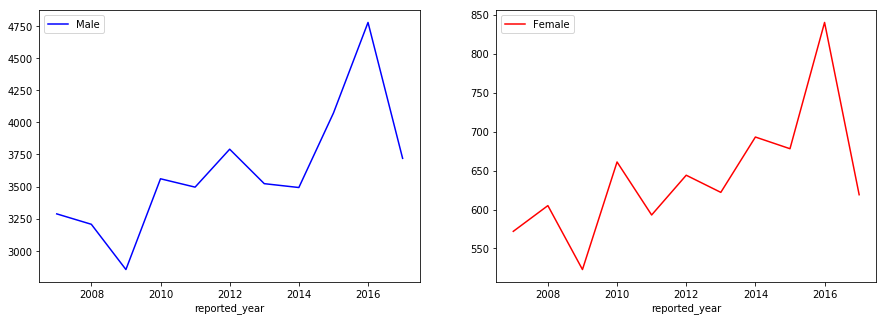

In [12]:
# time trends by sex
fig, (ax1, ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               sharex=False,
                               sharey=False,
                               figsize=(15, 5))
homicide[homicide['victim_sex'] == 'Male'].groupby('reported_year')['uid'].count().sort_index(ascending=True).plot(ax=ax1, kind='line', label='Male', color='blue').legend(loc='upper left')
homicide[homicide['victim_sex'] == 'Female'].groupby('reported_year')['uid'].count().sort_index(ascending=True).plot(ax=ax2, kind='line', label='Female', color='red').legend(loc='upper left')


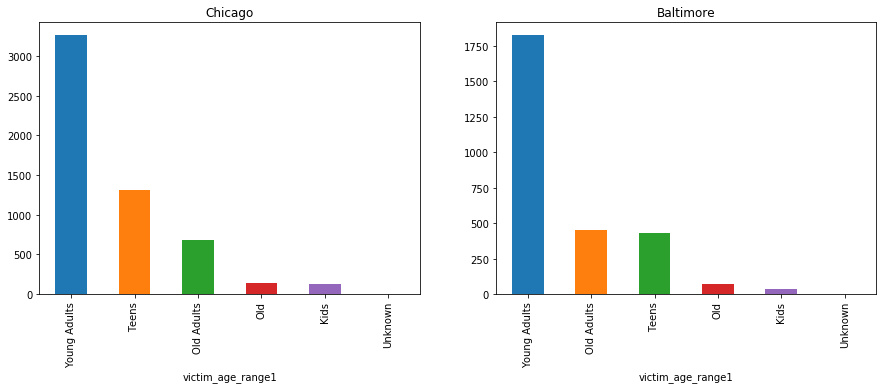

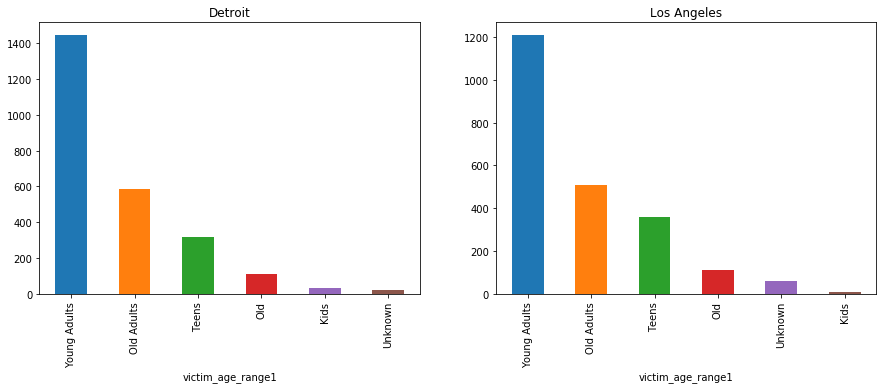

In [13]:
# plot homicides by age range for each major city identified
fig, (ax1,ax2) = plt.subplots(nrows=1,
                         ncols=2,
                         sharex=False,
                         sharey=False,
                         figsize=(15,5))

homicide[homicide['city'] == 'Chicago'].groupby('victim_age_range1')['uid'].count().sort_values(ascending=False).plot(ax=ax1, kind='bar', title='Chicago')
homicide[homicide['city'] == 'Baltimore'].groupby('victim_age_range1')['uid'].count().sort_values(ascending=False).plot(ax=ax2,kind='bar', title='Baltimore')

fig, (ax1,ax2) = plt.subplots(nrows=1,
                         ncols=2,
                         sharex=False,
                         sharey=False,
                         figsize=(15,5))

homicide[homicide['city'] == 'Detroit'].groupby('victim_age_range1')['uid'].count().sort_values(ascending=False).plot(ax=ax1,kind='bar', title='Detroit')
homicide[homicide['city'] == 'Los Angeles'].groupby('victim_age_range1')['uid'].count().sort_values(ascending=False).plot(ax=ax2,kind='bar', title='Los Angeles')

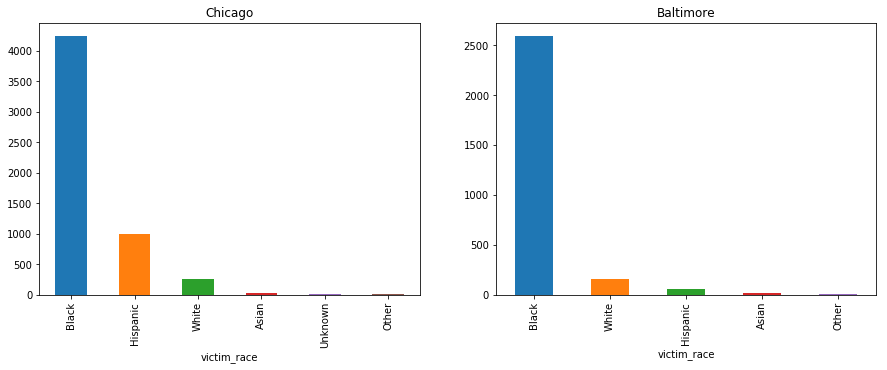

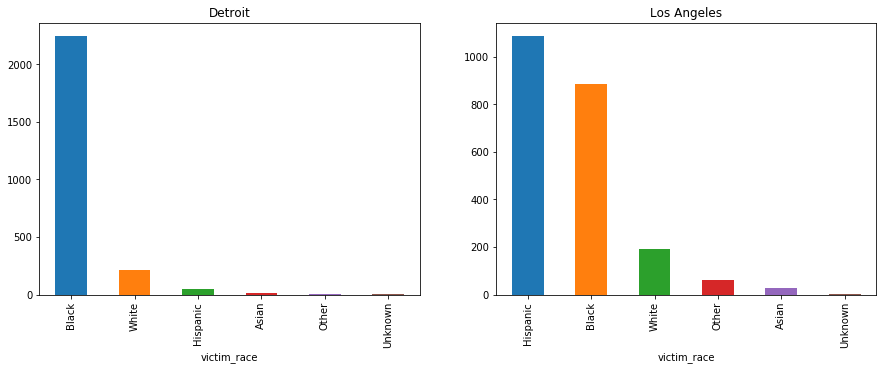

In [14]:
# plot homicides by race for each major city identified
fig, (ax1,ax2) = plt.subplots(nrows=1,
                         ncols=2,
                         sharex=False,
                         sharey=False,
                         figsize=(15,5))

homicide[homicide['city'] == 'Chicago'].groupby('victim_race')['uid'].count().sort_values(ascending=False).plot(ax=ax1, kind='bar', title='Chicago')
homicide[homicide['city'] == 'Baltimore'].groupby('victim_race')['uid'].count().sort_values(ascending=False).plot(ax=ax2,kind='bar', title='Baltimore')

fig, (ax1,ax2) = plt.subplots(nrows=1,
                         ncols=2,
                         sharex=False,
                         sharey=False,
                         figsize=(15,5))

homicide[homicide['city'] == 'Detroit'].groupby('victim_race')['uid'].count().sort_values(ascending=False).plot(ax=ax1,kind='bar', title='Detroit')
homicide[homicide['city'] == 'Los Angeles'].groupby('victim_race')['uid'].count().sort_values(ascending=False).plot(ax=ax2,kind='bar', title='Los Angeles')

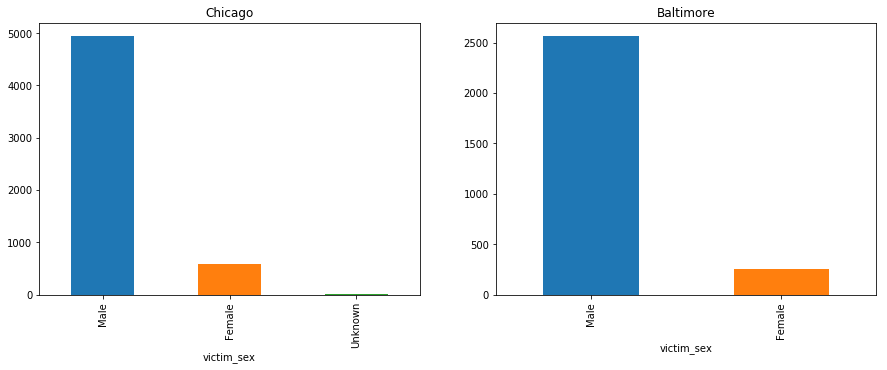

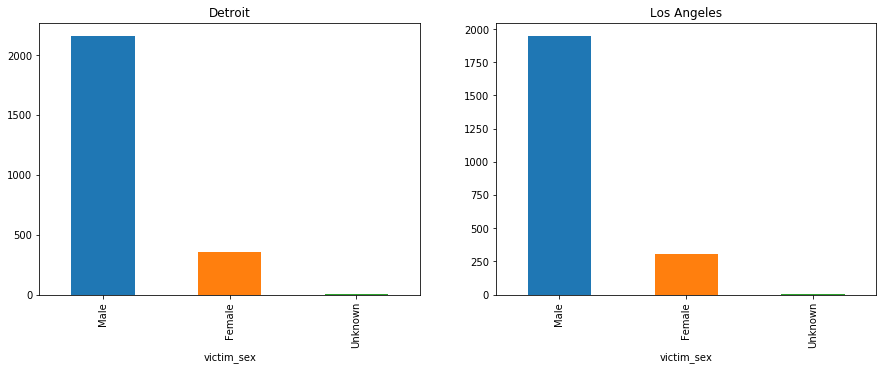

In [15]:
# plot homicides by gender for each major city identified
fig, (ax1,ax2) = plt.subplots(nrows=1,
                         ncols=2,
                         sharex=False,
                         sharey=False,
                         figsize=(15,5))

homicide[homicide['city'] == 'Chicago'].groupby('victim_sex')['uid'].count().sort_values(ascending=False).plot(ax=ax1, kind='bar', title='Chicago')
homicide[homicide['city'] == 'Baltimore'].groupby('victim_sex')['uid'].count().sort_values(ascending=False).plot(ax=ax2,kind='bar', title='Baltimore')

fig, (ax1,ax2) = plt.subplots(nrows=1,
                         ncols=2,
                         sharex=False,
                         sharey=False,
                         figsize=(15,5))

homicide[homicide['city'] == 'Detroit'].groupby('victim_sex')['uid'].count().sort_values(ascending=False).plot(ax=ax1,kind='bar', title='Detroit')
homicide[homicide['city'] == 'Los Angeles'].groupby('victim_sex')['uid'].count().sort_values(ascending=False).plot(ax=ax2,kind='bar', title='Los Angeles')

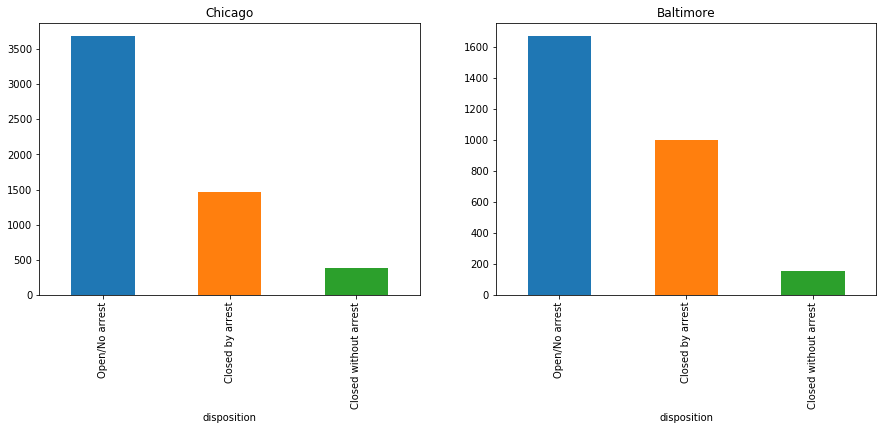

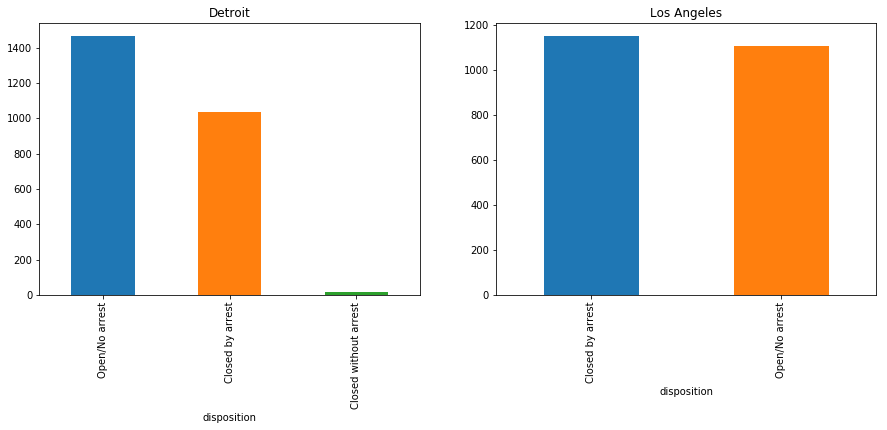

In [16]:
# plot homicides by disposition for each major city identified
fig, (ax1,ax2) = plt.subplots(nrows=1,
                         ncols=2,
                         sharex=False,
                         sharey=False,
                         figsize=(15,5))

homicide[homicide['city'] == 'Chicago'].groupby('disposition')['uid'].count().sort_values(ascending=False).plot(ax=ax1, kind='bar', title='Chicago')
homicide[homicide['city'] == 'Baltimore'].groupby('disposition')['uid'].count().sort_values(ascending=False).plot(ax=ax2,kind='bar', title='Baltimore')

fig, (ax1,ax2) = plt.subplots(nrows=1,
                         ncols=2,
                         sharex=False,
                         sharey=False,
                         figsize=(15,5))

homicide[homicide['city'] == 'Detroit'].groupby('disposition')['uid'].count().sort_values(ascending=False).plot(ax=ax1,kind='bar', title='Detroit')
homicide[homicide['city'] == 'Los Angeles'].groupby('disposition')['uid'].count().sort_values(ascending=False).plot(ax=ax2,kind='bar', title='Los Angeles')

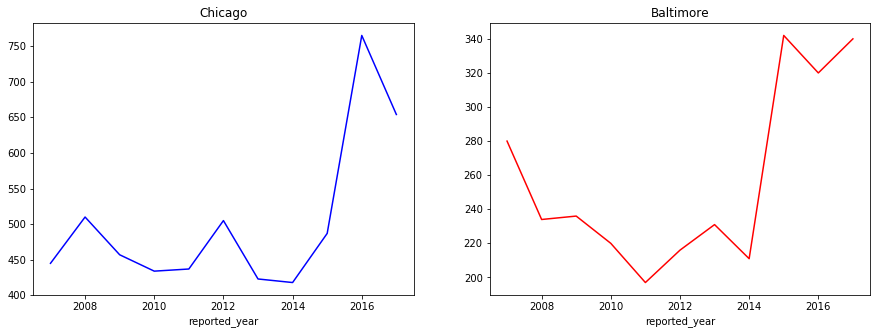

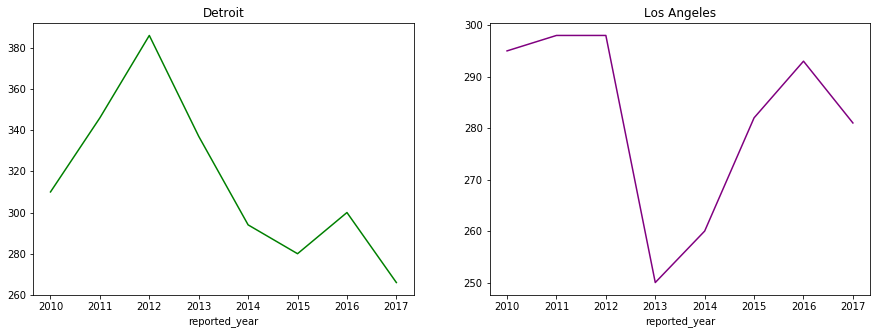

In [17]:
# time trends for each major city identified
fig, (ax1,ax2) = plt.subplots(nrows=1,
                         ncols=2,
                         sharex=False,
                         sharey=False,
                         figsize=(15,5))

homicide[homicide['city'] == 'Chicago'].groupby('reported_year')['uid'].count().sort_index(ascending=True).plot(ax=ax1, kind='line', color='blue', title='Chicago')
homicide[homicide['city'] == 'Baltimore'].groupby('reported_year')['uid'].count().sort_index(ascending=True).plot(ax=ax2, kind='line', color='red', title='Baltimore')

fig, (ax1,ax2) = plt.subplots(nrows=1,
                         ncols=2,
                         sharex=False,
                         sharey=False,
                         figsize=(15,5))

homicide[homicide['city'] == 'Detroit'].groupby('reported_year')['uid'].count().sort_index(ascending=True).plot(ax=ax1, kind='line', color='green', title='Detroit')
homicide[homicide['city'] == 'Los Angeles'].groupby('reported_year')['uid'].count().sort_index(ascending=True).plot(ax=ax2, kind='line', color='purple', title='Los Angeles')
